# Analysis of Microarray & Microtiter plates
Analysis of peptide-virus binding signals.

This notebook provides simple visualisation and analysis functions to work with experimental data sets from the FluType project.

In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import analysis

In [2]:
data_ids = {'2017-05-12_MTP_R1','2017-05-12_MTP_R1_div_back' ,'flutype_test'
         ,'2017-05-12_MTP_R1_sub_back', 'N10'}

In [3]:
data_id = 'N00010'
#data_id = '2017-05-12_MTP_R1'
#data_id = '2017-05-12_MTP_R1_div_back'
#data_id = '2017-05-12_MTP_R1_sub_back'
#data_id = 'flutype_test'

data = analysis.load_data(data_id)

Ana=analysis.Analysis(*data)
display(Ana.spot.head(10))

--------------------------------------------------------------------------------
Loading data corresponding to data ID :N10
--------------------------------------------------------------------------------
Peptide .gal :N10_pep.gal
Spot intensity file  :N10.csv
Meta  :N10.meta
Virus .gal :N10_vir.gal
--------------------------------------------------------------------------------
Spot intensities for the data ID (N10) are not averaged but primary values
--------------------------------------------------------------------------------
 Necessary coresponding data was loaded 
--------------------------------------------------------------------------------


,Column,Row,Peptide,Referenz,Virus,Intensity,Std,Replica
0,1,1,Leuchtefix 1.0,True,Pan,5259,0,0
1,1,2,blank,False,Pan,0,0,0
2,1,3,blank,False,Pan,0,0,1
3,1,4,blank,False,Pan,0,0,2
4,1,5,blank,False,Pan,0,0,3
5,1,6,blank,False,Pan,0,0,4
6,1,7,blank,False,Pan,0,0,5
7,1,8,Leuchtefix 1.0,True,Pan,8454,0,1
8,1,9,blank,False,Pan,0,0,6
9,1,10,blank,False,Pan,0,0,7


## Heatmap of array/plate with peptide and virus information

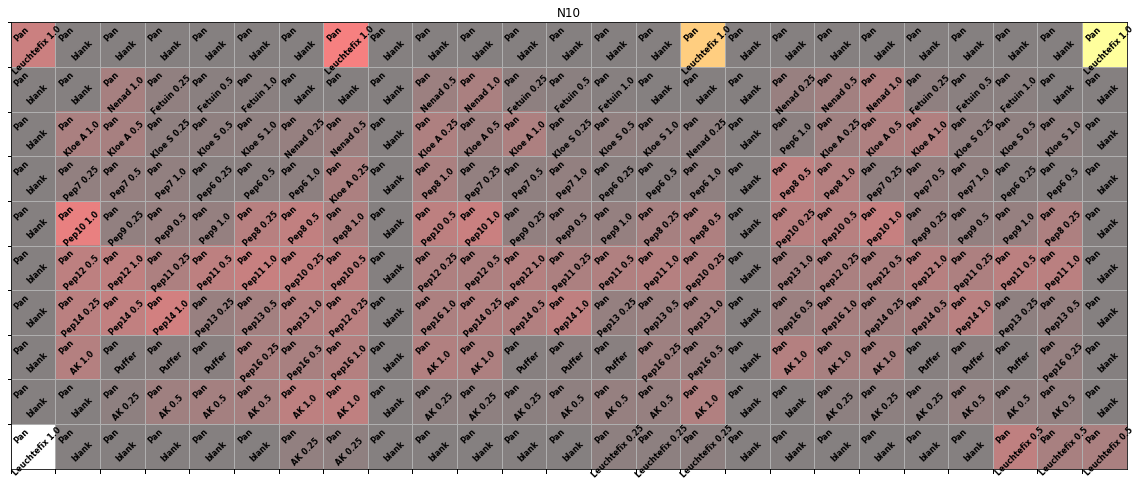

In [4]:
# shows figure
fig = Ana.heatmap(figsize=(20,10))

plt.title(data_id,fontsize="large")
fig.savefig("./results/{}_heatmap1.png".format(data_id),bbox_inches='tight')
plt.show()

## Heatmap mini

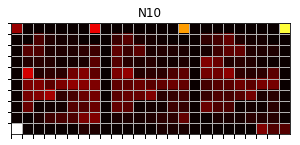

In [5]:
#fig = Ana.heatmap(descript=False,nrows=1,ncols=1,figsize=(5,2.5))


fig = Ana.heatmap(descript=False,figsize=(5,2.5))
plt.title(data_id,fontsize="large")
plt.show()
fig.savefig("./results/{}_heatmap2.png".format(data_id),bbox_inches='tight')


## Only description

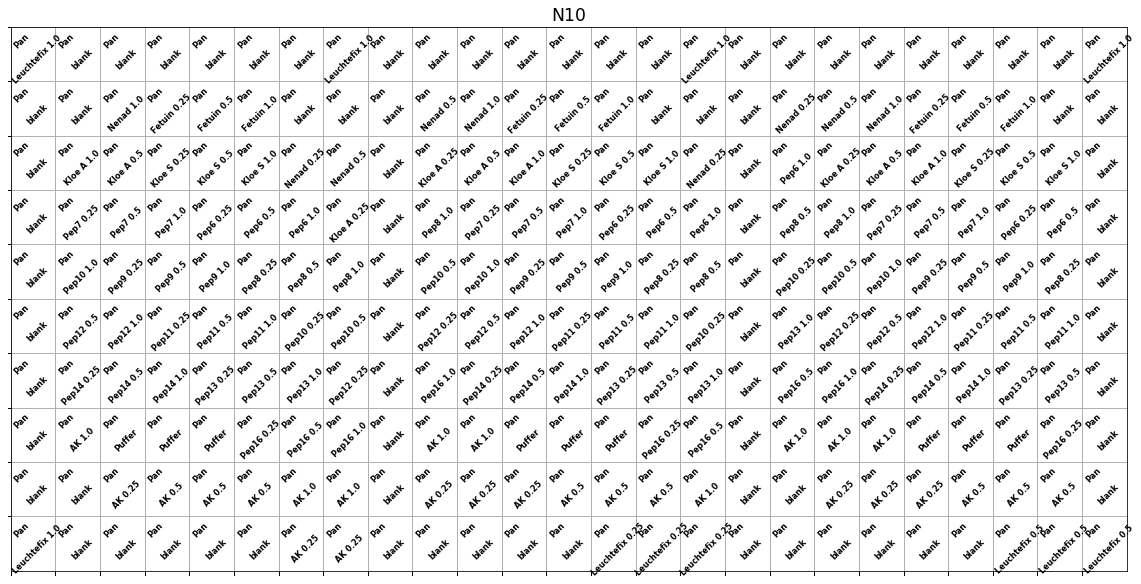

In [6]:
fig = Ana.heatmap(heatmap=False,figsize=(20,10))
plt.title(data_id,fontsize="xx-large")
plt.show()

## Barplot aligned to peptides

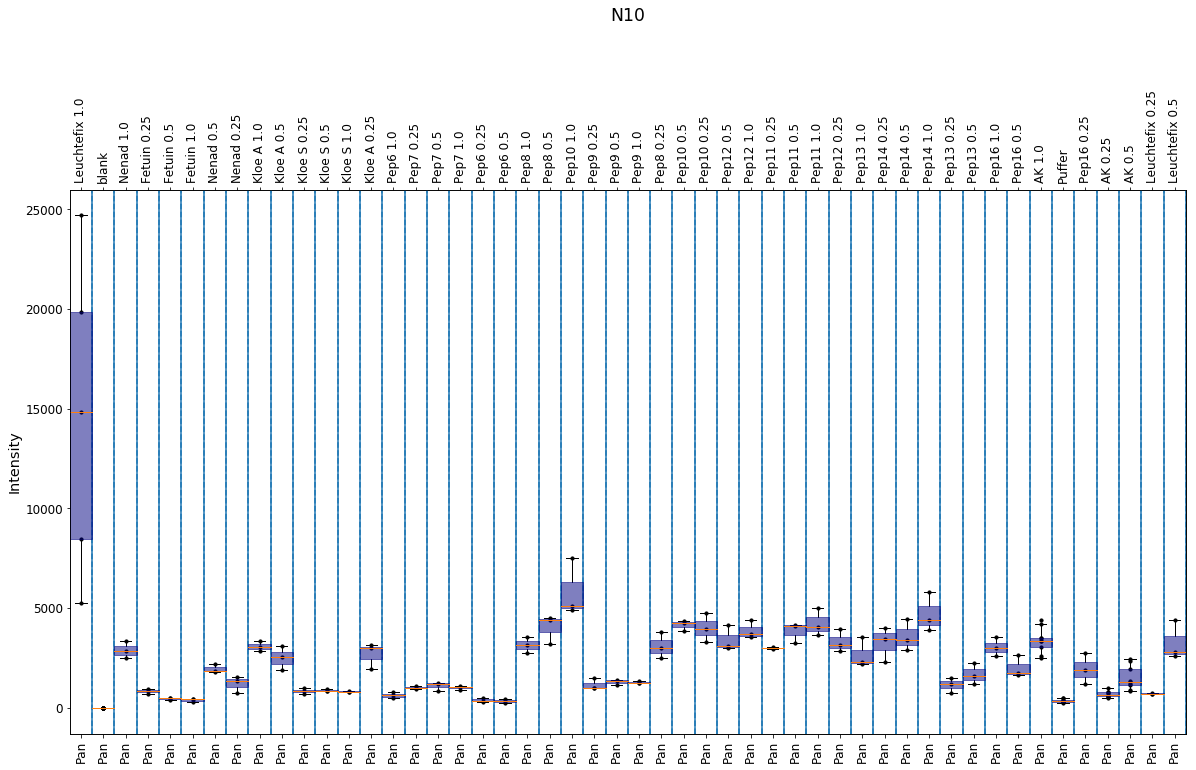

In [7]:
fig = Ana.barplot(figsize=(20,10))
plt.title(data_id,y=1.30,fontsize="xx-large")
fig.savefig("./results/{}_barplot_pep.png".format(data_id),bbox_inches='tight')
plt.show()

## Barplot aligned to virus

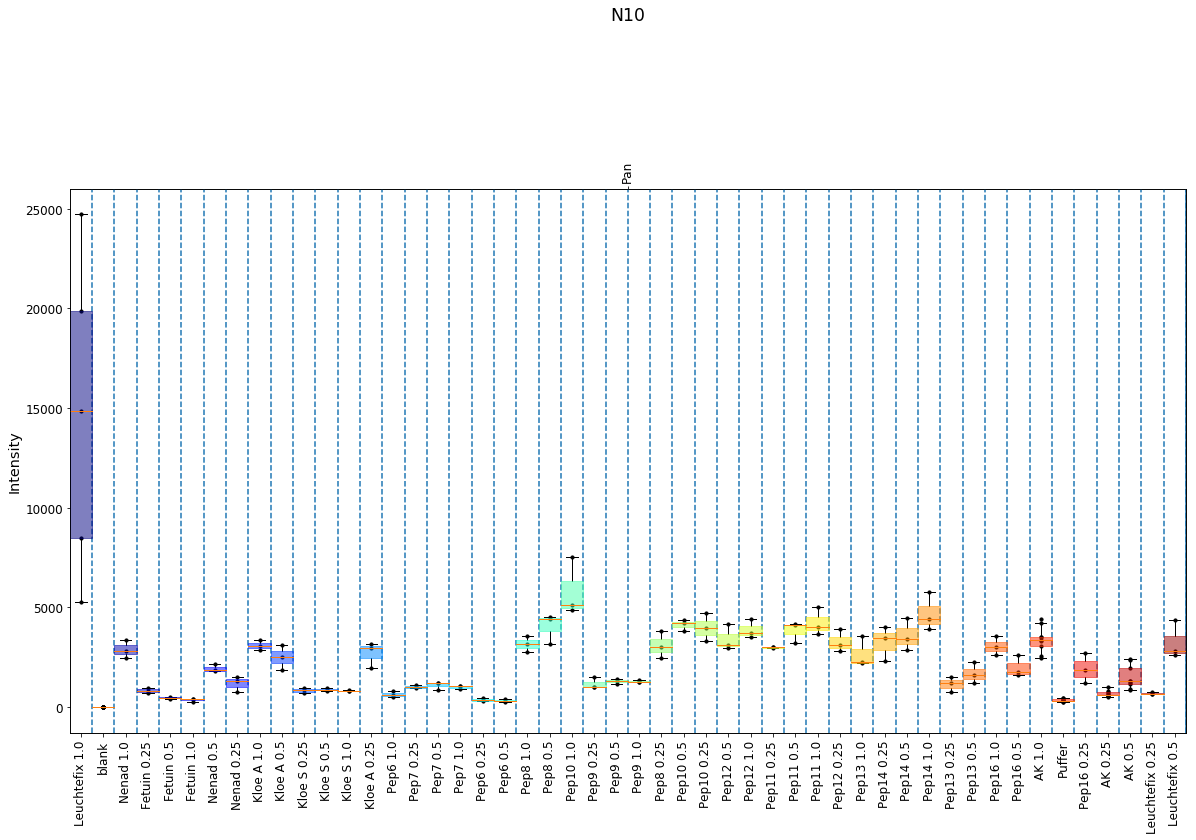

In [8]:
fig = Ana.barplot(align="vir",figsize=(20,10))
plt.title(data_id,y=1.30,fontsize="xx-large")
fig.savefig("./results/{}_barplot_vir.png".format(data_id),bbox_inches='tight')
plt.show()

## PCA 2D Plot

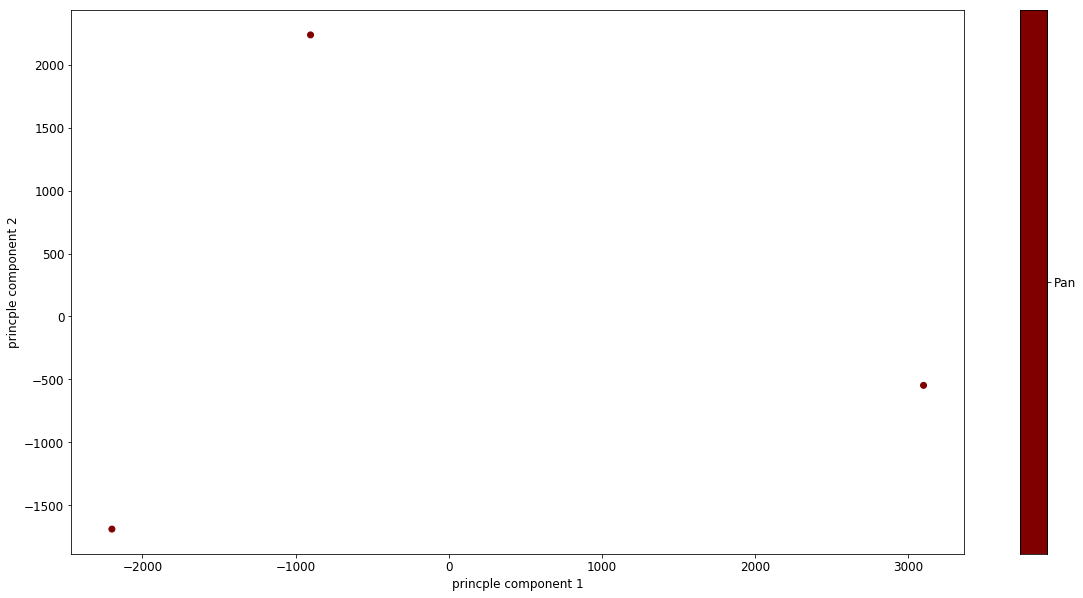

In [9]:
data_pca = Ana.pca()
fig = analysis.pca_2dplot(data_pca[0],figsize=(20,10))
fig.savefig("./results/{}_pca.png".format(data_id),bbox_inches='tight')
plt.show()

## Correlation Plot

In [10]:
fig = Ana.correlation_plot(type="both",figsize=(20,10))
fig.savefig("./results/{}_corr_matrix_plot.png".format(data_id),bbox_inches='tight')
plt.show()

Exception: -> Not enough viruses or peptides in data set